In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D


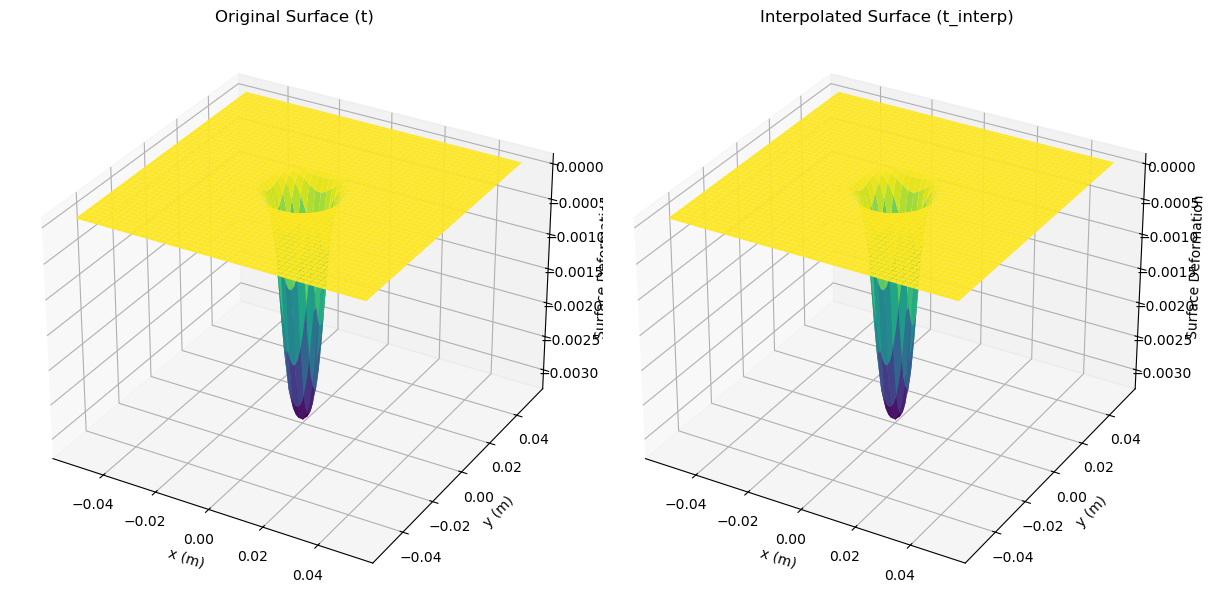

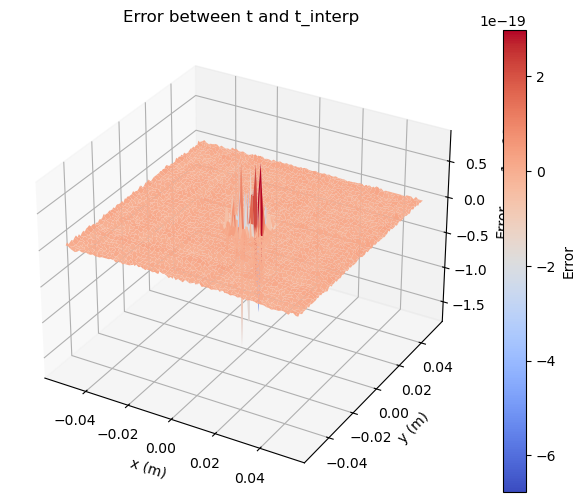

In [12]:
# Profile funtions
def exp_f(x,a,b,c):
    return a*np.exp(-(x/b)) + c;
 
def pol2_f(x,a,b,c):
    return a*x + b*x**2 + c;
 
def Puff_profile(x,y,ta):
    # evaluation of surface deformation extracted from EXP_ID=142
    upper = exp_f(ta,-6.17761515e-05,  1.78422769e+00,  7.40139158e-05);
    lower = exp_f(ta,0.00377156,  1.45234773, -0.00326456);
    a     = pol2_f(ta,0.31294945, -0.00963803,  2.6743828);
    b     = pol2_f(ta,38.56906702,  -1.6278976 , 453.87937763);
    r = np.sqrt(x**2 + y**2);
    # scaled logistic function describing surface deformation
    return lower + (upper - lower) / (1 + np.exp(a - b * r));

# Initialise
x = np.linspace(-52e-3,52e-3,100); # in meter
y = np.linspace(-52e-3,52e-3,100); # in meter
x2, y2 = np.meshgrid(x, y)
ta = 10;                           # Analysis time
 
t = Puff_profile(x2,y2,ta);

# Apply 2D cubic spline interpolation
t_interp = interpolate.RectBivariateSpline(x, y, t)

 
# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot for t
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x2, y2, t, cmap='viridis')
ax1.set_title('Original Surface (t)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_zlabel('Surface Deformation')

# Plot for t_interp
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, t_interp(x, y), cmap='viridis')
ax2.set_title('Interpolated Surface (t_interp)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_zlabel('Surface Deformation')

plt.tight_layout()
plt.show()

# Calculate the error between t and t_interp
error = t_interp(x, y) - t

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x2, y2, error, cmap='coolwarm', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Error')
ax.set_title('Error between t and t_interp')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('Error')
plt.show()


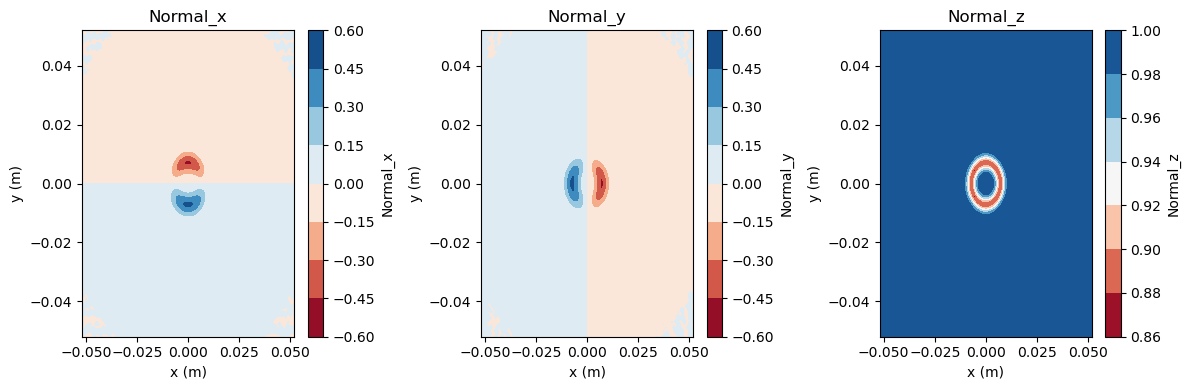

In [20]:
# Compute the gradients of t_interp with respect to x and y
grad_x, grad_y = np.gradient(t_interp(x, y), x, y)

# Compute the components of the normal vectors
normal_x = -grad_x
normal_y = -grad_y
normal_z = np.ones_like(normal_x)

# Normalize the normal vectors
magnitude = np.sqrt(normal_x**2 + normal_y**2 + normal_z**2)
normal_x /= magnitude
normal_y /= magnitude
normal_z /= magnitude

# Create separate contour plots for each component of the normal vectors
plt.figure(figsize=(12, 4))

# Plot for normal_x
plt.subplot(131)
contour_x = plt.contourf(x2, y2, normal_x, cmap='RdBu')
plt.colorbar(contour_x, label='Normal_x')
plt.title('Normal_x')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Plot for normal_y
plt.subplot(132)
contour_y = plt.contourf(x2, y2, normal_y, cmap='RdBu')
plt.colorbar(contour_y, label='Normal_y')
plt.title('Normal_y')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Plot for normal_z
plt.subplot(133)
contour_z = plt.contourf(x2, y2, normal_z, cmap='RdBu')
plt.colorbar(contour_z, label='Normal_z')
plt.title('Normal_z')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.tight_layout()
plt.show()

